In [1]:
from numpy import array, log
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("ticks")

In [2]:
labels = ['May 17', 'May 20', 'June 02', 'June 06']
files = [
    "sn2002cx-20020517-fast.flm",
    "sn2002cx-20020520-fast.flm",
    "sn2002cx-20020602-fast.flm",
    "sn2002cx-20020606-fast.flm",
]

In [3]:
def normalize_area(wavelengths, fluxes):
    """Takes a binned spectrum as two arrays and returns the flux normalized to
    an area of 1000.

    Args:
        wavelengths (array): The wavelengths of the center of each bin of the
            spectrum.
        fluxes (array): The flux value for each bin.

    Returns:
        array: The flux values normalized to have a total area of 1000.

    """
    desired_area = 1000
    bin_width = wavelengths[1] - wavelengths[0]
    area = sum(fluxes) * bin_width
    normed_fluxes = (fluxes / area) * desired_area

    return normed_fluxes

/home/agude/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


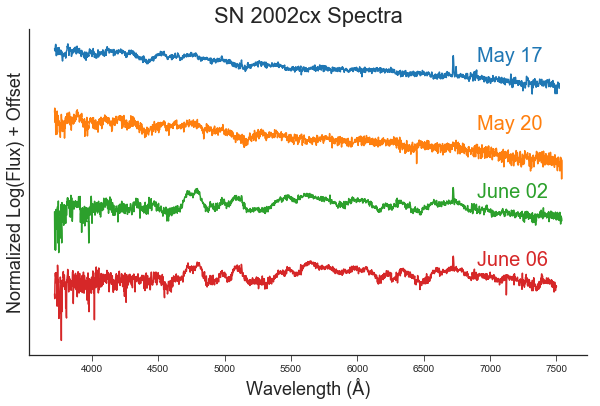

In [4]:
# Work on spectra
fig, ax = plt.subplots(figsize=(10, 6))

for i, file in enumerate(files):
    offset = (len(files) - i) * 3

    # Open data
    with open(file) as f:
        cont = f.read()

    cont = cont.splitlines()

    # Process data
    wavelengths = []
    fluxes = []
    for line in cont:
        if line.startswith('#'):
            continue

        sline = line.split()
        wavelengths.append(float(sline[0]))
        fluxes.append(float(sline[1]))

    # Normalize the area of the flux
    fluxes = array(fluxes)
    fluxes = log(normalize_area(wavelengths, fluxes))
    fluxes = fluxes + offset

    # Plot
    plot = plt.plot(wavelengths, fluxes, label=labels[i])
    # These numbers below were selected through trial and error
    # to offset the spectra date labels nicely
    text_y = 10.8 - (2.9 * i)
    ax.text(6900, text_y, labels[i], fontsize=20, color=plot[0].get_color())

# Remove y ticks
plt.yticks([])

sns.despine()

plt.xlabel(r'Wavelength (Å)', fontsize=18)
plt.ylabel('Normalized Log(Flux) + Offset', fontsize=18)
plt.title('SN 2002cx Spectra', fontsize=22)

plt.savefig("/tmp/SN_2002cx_Spectra_log.svg", bbox_inches="tight")

plt.show()